In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [253]:
data = pd.read_csv("1601384279_9602122_iris_new_data.txt", sep=' ', names=['sepal_len','sepal_wid','petal_len','petal_wid'])
data

,sepal_len,sepal_wid,petal_len,petal_wid
0,5.7,4.4,1.5,0.4
1,5.5,4.2,1.4,0.2
2,5.2,4.1,1.5,0.1
3,5.8,4.0,1.2,0.2
4,5.4,3.9,1.7,0.4
...,...,...,...,...
145,4.5,2.3,1.3,0.3
146,6.0,2.2,5.0,1.5
147,6.2,2.2,4.5,1.5
148,6.0,2.2,4.0,1.0


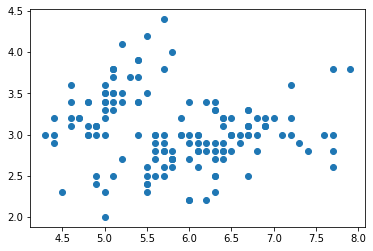

In [254]:
# Feature Analysis

plt.scatter(data.iloc[:,0], data.iloc[:,1])
plt.show()

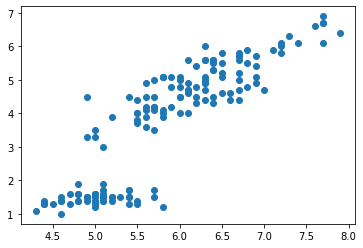

In [255]:
plt.scatter(data.iloc[:,0], data.iloc[:,2])
plt.show()

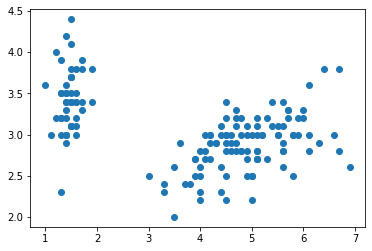

In [256]:
plt.scatter(data.iloc[:,2], data.iloc[:,1])
plt.show()

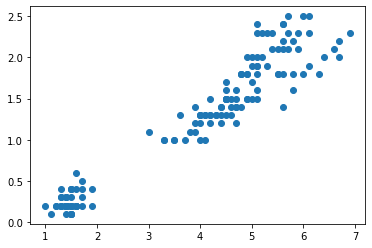

In [257]:
plt.scatter(data.iloc[:,2], data.iloc[:,3])
plt.show()

In [301]:
data = data[['petal_len','petal_wid']]
print(data.head(20))

    petal_len  petal_wid
0         1.5        0.4
1         1.4        0.2
2         1.5        0.1
3         1.2        0.2
4         1.7        0.4
5         1.3        0.4
6         6.7        2.2
7         6.4        2.0
8         1.9        0.4
9         1.7        0.3
10        1.6        0.2
11        1.5        0.3
12        1.5        0.4
13        1.5        0.2
14        1.5        0.2
15        6.1        2.5
16        1.4        0.2
17        1.0        0.2
18        1.6        0.6
19        1.5        0.2


In [259]:
data.isnull().sum()

petal_len    0
petal_wid    0
dtype: int64

In [9]:
# normalization
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [10]:
data = normalize(data)
data
data.shape[0]

150

In [260]:
from sklearn.metrics.pairwise import euclidean_distances

In [12]:
def initialize_centroids(data, k):
    # no of attributes
    n = np.shape(data)[1]    
    # initialize centroids as zero matrices    
    centroids = np.mat(np.zeros((k,n)))
    centroids[:] = np.nan
    print("here")
    while np.isnan(centroids.reshape(1,2*k)).any():
        print("here2??")
    # choose random centroids (PCA)
        for j in range(k):
            centroids[j,:] = data.iloc[np.random.randint(data.shape[0])]
    return centroids

In [512]:
def initialize_centroids(data, k):
    # no of attributes
    n = np.shape(data)[1] 
    print(n)
    # initialize centroids as zero matrices    
    centroids = np.empty([k,n])
#     print(centroids)
    for j in range(k):
        centroids[j,:] = data.iloc[np.random.randint(np.shape(data)[0])]
    return centroids

In [492]:
def initialize_centroids(data, k):
    # no of attributes
    n = np.shape(data)[1] 
    print(n)
    # initialize centroids as zero matrices    
    centroids = np.empty([k,n])
#     print(centroids)
    for j in range(k):
        centroids[j,:] = data.iloc[np.random.randint(10000)%150]
    return centroids

In [536]:
def initialize_centroids(data, k):
    centroids = data.sample(n=k)
    return centroids.to_numpy()

In [543]:
init_centroids = initialize_centroids(data, k=8)
init_centroids

array([[5.4, 2.1],
       [1.3, 0.2],
       [1.9, 0.4],
       [1.6, 0.6],
       [4.2, 1.2],
       [1.3, 0.2],
       [5.6, 1.8],
       [4.9, 2. ]])

In [308]:
import scipy.spatial.distance as metric
from sklearn.metrics.pairwise import euclidean_distances

In [16]:
def euclidean_dist(A, B):
    
    return metric.euclidean(A, B)

In [17]:
euclidean_dist(init_centroids[0], init_centroids[1])

0.27477535739954273

In [522]:
m = np.shape(data)[0]
k = 3
cents = initialize_centroids(data, k=3)
for i in range(m):
    for j in range(k):
        dist_ji = euclidean_distances([cents[j,:]], [data.iloc[i,:]])
        print(dist_ji)

[[0.2]]
[[2.94108823]]
[[4.03112887]]
[[0.1]]
[[3.10161248]]
[[4.20475921]]
[[0.1]]
[[3.04630924]]
[[4.15932687]]
[[0.3]]
[[3.28937684]]
[[4.38634244]]
[[0.28284271]]
[[2.7513633]]
[[3.84837628]]
[[0.28284271]]
[[3.13209195]]
[[4.21544778]]
[[5.57135531]]
[[2.56320112]]
[[1.5132746]]
[[5.22015325]]
[[2.21359436]]
[[1.2]]
[[0.4472136]]
[[2.56320112]]
[[3.66742416]]
[[0.2236068]]
[[2.78567766]]
[[3.89101529]]
[[0.1]]
[[2.91547595]]
[[4.02492236]]
[[0.1]]
[[2.97321375]]
[[4.07185461]]
[[0.2]]
[[2.94108823]]
[[4.03112887]]
[[0.]]
[[3.00832179]]
[[4.11460812]]
[[0.]]
[[3.00832179]]
[[4.11460812]]
[[5.14295635]]
[[2.16333077]]
[[1.02956301]]
[[0.1]]
[[3.10161248]]
[[4.20475921]]
[[0.5]]
[[3.47850543]]
[[4.56946386]]
[[0.41231056]]
[[2.78926514]]
[[3.86264158]]
[[0.]]
[[3.00832179]]
[[4.11460812]]
[[0.14142136]]
[[3.06757233]]
[[4.16293166]]
[[0.1]]
[[3.10161248]]
[[4.20475921]]
[[0.2236068]]
[[3.16227766]]
[[4.25440948]]
[[0.2]]
[[3.19530906]]
[[4.29534632]]
[[4.65295605]]
[[1.70293864]]
[[0

In [497]:
def kmeans(data, k):

    # Number of rows in dataset
    m = np.shape(data)[0]
    
    # Hold the instance cluster assignments
    cluster_assignments = np.mat(np.zeros((m, 2)))
    
    # Initialize centroids
    cents = initialize_centroids(data, k)
    print(cents)
    # Preserve original centroids
    cents_orig = cents.copy()
    
    changed = True
    num_iter = 0
    
    # Loop until no changes to cluster assignments
    while changed:
    
        changed = False
    
        # For every instance (row in dataset)
        for i in range(m):
    
            # Track minimum distance, and vector index of associated cluster
            min_dist = np.inf
            min_index = -1
#             print("cents test is",cents[i,:])
            # Calculate distances
            for j in range(k):
                dist_ji = euclidean_distances([cents[j,:]], [data.iloc[i,:]])
                if dist_ji < min_dist:
                    min_dist = dist_ji
                    min_index = j

            # Check if cluster assignment of instance has changed
            if cluster_assignments[i, 0] != min_index: 
                changed = True

            # Assign instance to appropriate cluster
            cluster_assignments[i, :] = min_index, min_dist**2

        # Update centroid location
        for p in range(k):
            indices = [i for i, x in enumerate(cluster_assignments) if x[0,0] == int(p)]
            cents[p] = np.mean(data.iloc[indices], axis=0)
            
        
        # Count iterations
        num_iter += 1
        print("centroids after iteration",num_iter,":\n",cents)
    
    # Return important stuff when done
    return cents, cluster_assignments, num_iter, cents_orig

In [498]:
final_centroids, cluster_ass, iterno, original_centroids = kmeans(data, k=3)
array = np.squeeze(np.asarray(cluster_ass[:,0])).astype(np.int64) + 1
array

2
[[1.  0.2]
 [4.  1.2]
 [5.6 2.4]]
centroids after iteration 1 :
 [[1.464      0.244     ]
 [4.23673469 1.31428571]
 [5.54901961 2.02352941]]
centroids after iteration 2 :
 [[1.464      0.244     ]
 [4.25490196 1.33921569]
 [5.58367347 2.02653061]]
centroids after iteration 3 :
 [[1.464      0.244     ]
 [4.26923077 1.34230769]
 [5.59583333 2.0375    ]]
centroids after iteration 4 :
 [[1.464      0.244     ]
 [4.26923077 1.34230769]
 [5.59583333 2.0375    ]]


array([1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 1, 1, 3, 3,
       3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3,
       3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2])

In [135]:
ans = array.copy()
ans

array([3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1, 3, 3, 2, 2,
       2, 2, 2, 2, 1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3,
       3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1])

In [28]:
len(ans)

150

In [29]:
with open('iris_pred_values.txt', 'w') as filehandle:
    for listitem in ans:
        filehandle.write('%s\n' % listitem)
    print("Wrote",len(ans),"items successfully to iris_pred_values.txt")

Wrote 150 items successfully to iris_pred_values.txt


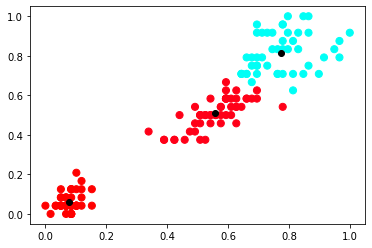

In [30]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=ans, s=50, cmap='hsv')
plt.scatter([final_centroids[:, 0]], [final_centroids[:, 1]], c='black', alpha=1)

In [547]:
def initialize_centroids(data, k):
    centroids = data.sample(n=k, random_state=3)
    return centroids.to_numpy()

In [548]:
sse = list()

for k in range(2,21,2):
    print("k = ",k)
    a,result,c,d = kmeans(data, k)
    wcss = 0
    for i in range(len(result)):
        wcss += result[i,1]
    sse.append(wcss)

k =  2
[[4.8 1.8]
 [1.2 0.2]]
centroids after iteration 1 :
 [[4.906 1.676]
 [1.464 0.244]]
centroids after iteration 2 :
 [[4.92525253 1.68181818]
 [1.49411765 0.26078431]]
centroids after iteration 3 :
 [[4.92525253 1.68181818]
 [1.49411765 0.26078431]]
k =  4
[[4.8 1.8]
 [1.2 0.2]
 [1.5 0.4]
 [5.4 2.3]]
centroids after iteration 1 :
 [[4.4515625  1.4375    ]
 [1.31052632 0.2       ]
 [1.603125   0.296875  ]
 [5.79142857 2.12857143]]
centroids after iteration 2 :
 [[4.37704918 1.40819672]
 [1.34814815 0.2037037 ]
 [1.6        0.29130435]
 [5.73333333 2.09487179]]
centroids after iteration 3 :
 [[4.34310345 1.38275862]
 [1.34814815 0.2037037 ]
 [1.6        0.29130435]
 [5.68333333 2.08095238]]
centroids after iteration 4 :
 [[4.31964286 1.36785714]
 [1.34814815 0.2037037 ]
 [1.6        0.29130435]
 [5.65227273 2.06818182]]
centroids after iteration 5 :
 [[4.30727273 1.36181818]
 [1.34814815 0.2037037 ]
 [1.6        0.29130435]
 [5.63777778 2.06      ]]
centroids after iteration 6 :
 [

centroids after iteration 9 :
 [[3.90384615 1.19230769]
 [1.23636364 0.22727273]
 [1.72857143 0.4       ]
 [5.21111111 2.04444444]
 [5.79230769 2.3       ]
 [4.69354839 1.52258065]
 [1.425      0.25625   ]
 [6.66       2.12      ]
 [5.88571429 1.72857143]
 [1.54375    0.175     ]]
centroids after iteration 10 :
 [[3.884      1.192     ]
 [1.23636364 0.22727273]
 [1.72857143 0.4       ]
 [5.21111111 2.04444444]
 [5.79230769 2.3       ]
 [4.684375   1.5125    ]
 [1.425      0.25625   ]
 [6.66       2.12      ]
 [5.88571429 1.72857143]
 [1.54375    0.175     ]]
centroids after iteration 11 :
 [[3.884      1.192     ]
 [1.23636364 0.22727273]
 [1.72857143 0.4       ]
 [5.21111111 2.04444444]
 [5.79230769 2.3       ]
 [4.684375   1.5125    ]
 [1.425      0.25625   ]
 [6.66       2.12      ]
 [5.88571429 1.72857143]
 [1.54375    0.175     ]]
k =  12
[[4.8 1.8]
 [1.2 0.2]
 [1.5 0.4]
 [5.4 2.3]
 [6.1 2.5]
 [5.1 1.9]
 [1.4 0.2]
 [6.7 2.2]
 [6.7 2. ]
 [1.5 0.1]
 [1.4 0.3]
 [5.7 2.1]]
centroids a

centroids after iteration 5 :
 [[4.48518519 1.40740741]
 [1.2        0.2       ]
 [1.53333333 0.41666667]
 [5.4        2.26363636]
 [5.9        2.3375    ]
 [5.         1.785     ]
 [1.4        0.18888889]
 [6.725      2.15      ]
 [6.2        1.875     ]
 [1.54375    0.175     ]
 [1.375      0.325     ]
 [5.64285714 1.75714286]
 [1.05       0.15      ]
 [1.3        0.23333333]
 [3.77368421 1.15263158]
 [1.78       0.36      ]]
centroids after iteration 6 :
 [[4.48518519 1.40740741]
 [1.2        0.2       ]
 [1.53333333 0.41666667]
 [5.4        2.26363636]
 [5.87777778 2.31111111]
 [5.         1.785     ]
 [1.4        0.18888889]
 [6.725      2.15      ]
 [6.2        1.875     ]
 [1.54375    0.175     ]
 [1.375      0.325     ]
 [5.63333333 1.7       ]
 [1.05       0.15      ]
 [1.3        0.23333333]
 [3.77368421 1.15263158]
 [1.78       0.36      ]]
centroids after iteration 7 :
 [[4.48518519 1.40740741]
 [1.2        0.2       ]
 [1.53333333 0.41666667]
 [5.4        2.26363636]
 [5.8

In [550]:
print(len(sse))
sse

10


[86.40394533571012,
 30.546183574879198,
 13.264191771358234,
 10.561680168621828,
 9.043806075868572,
 8.279801205738623,
 8.171384539071958,
 6.148799331029727,
 5.468484516214846,
 5.0277958437761985]

In [551]:
k_list = [i for i in range(2,21,2)]
k_list

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

([<matplotlib.axis.XTick at 0x7fe61e88fd30>,
 <a list of 10 Text major ticklabel objects>)

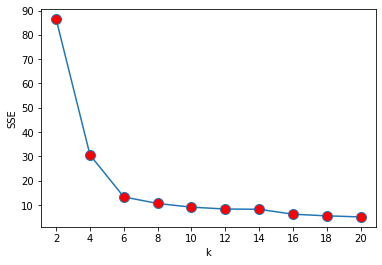

In [553]:
plt.plot(k_list, sse, marker='.', markerfacecolor='red', markersize=20)
plt.xlabel('k')
plt.ylabel('SSE')
plt.xticks(k_list)